### **Multi-Input models**

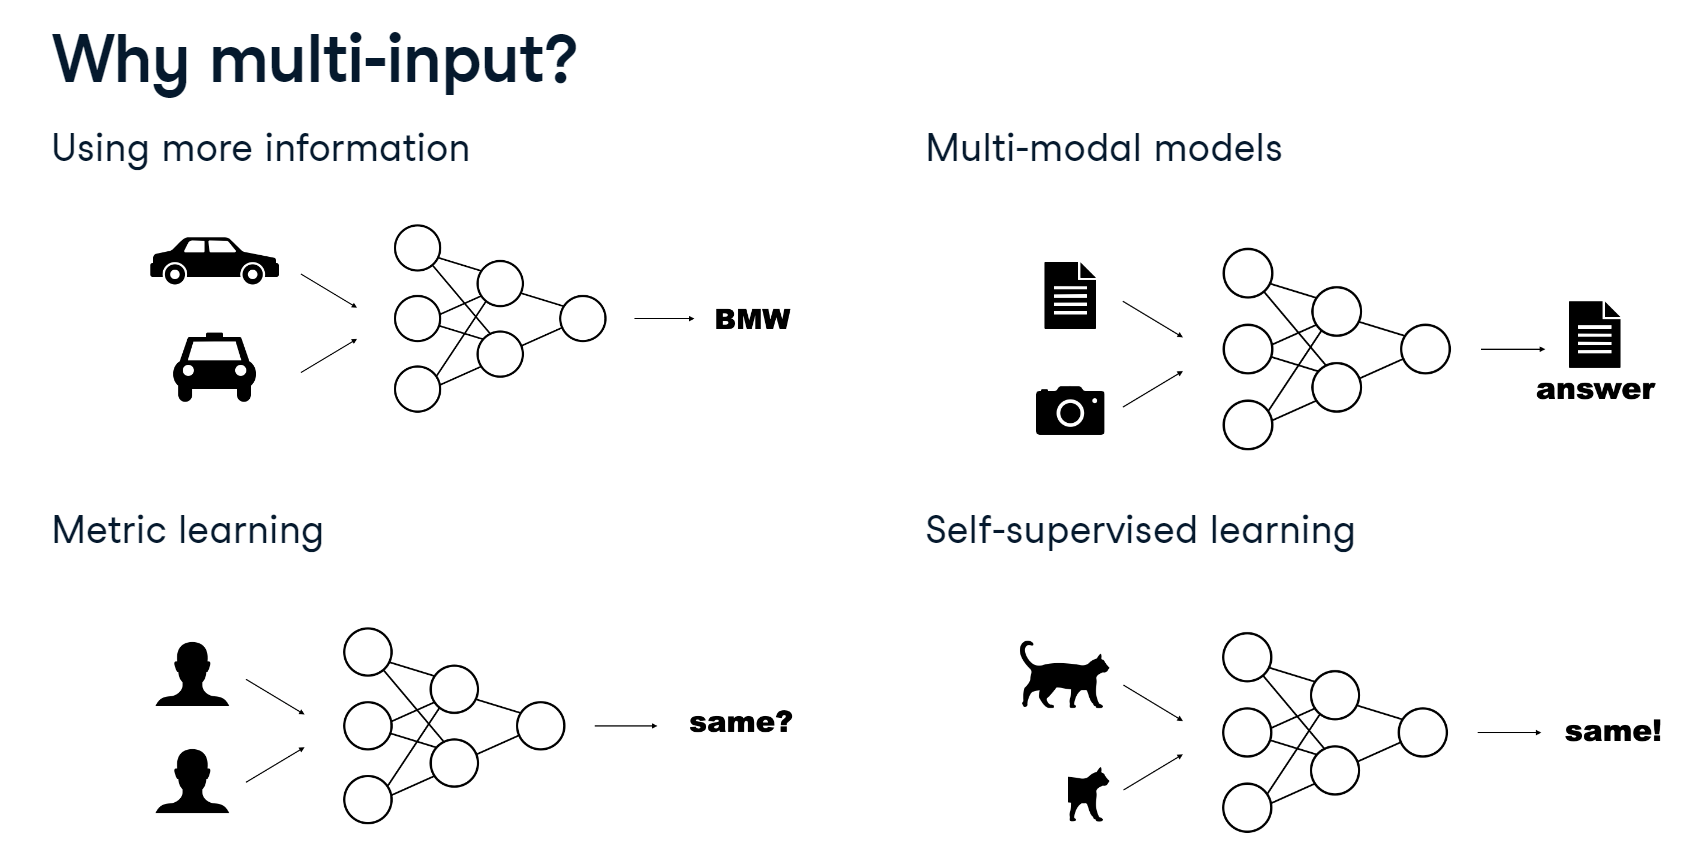

##### Let us use the following dataset to understand multi-model inputs in pytorch

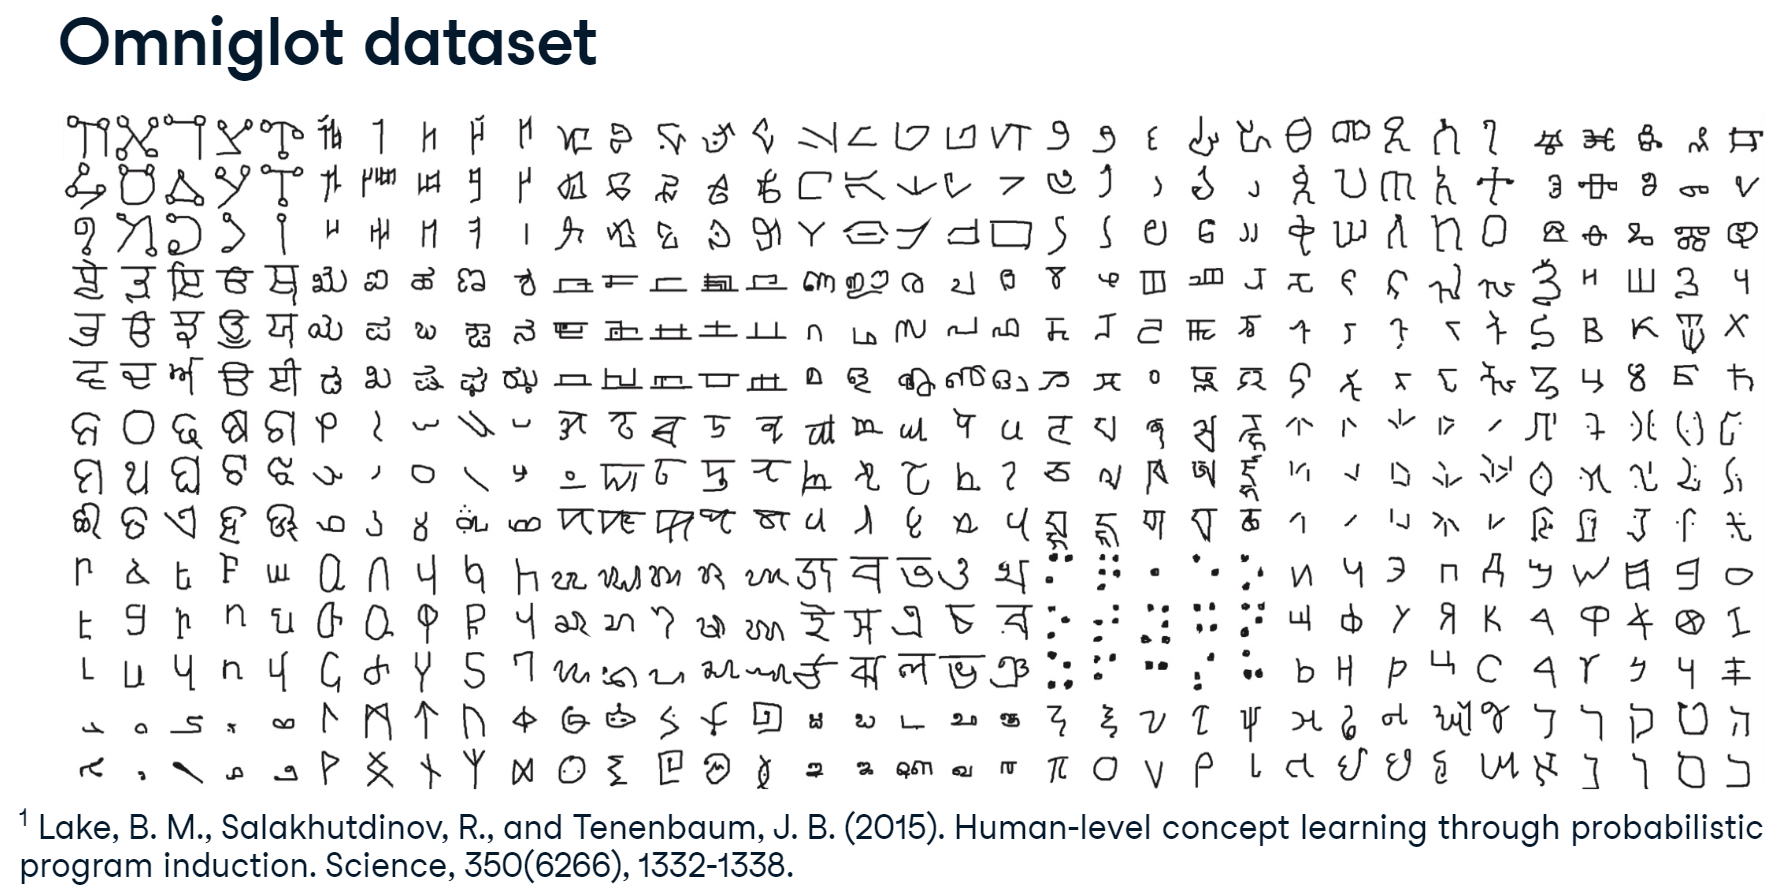

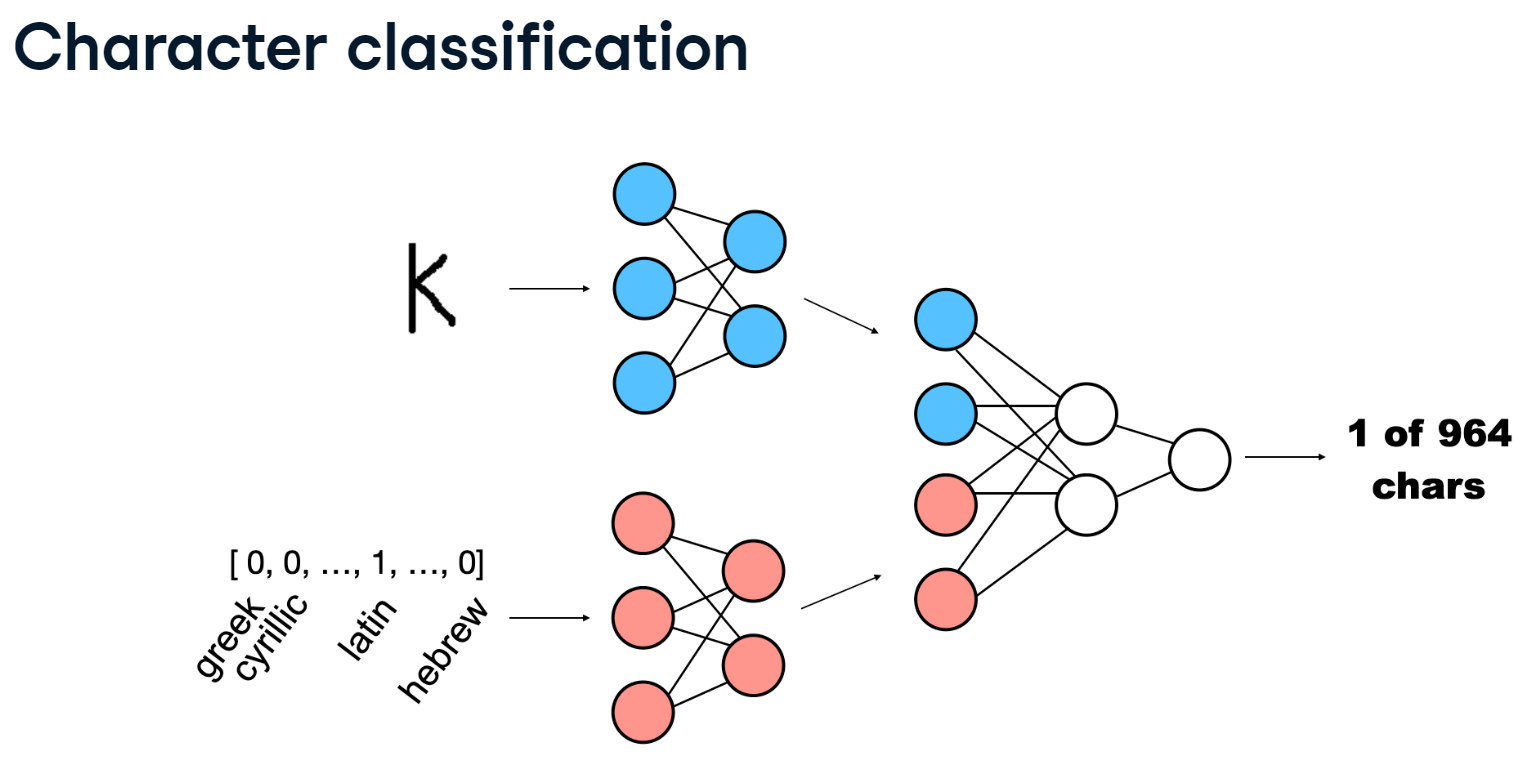

In [ ]:
from PIL import Image

# Two-input dataset

class OmniglotDataset(Dataset):
    def __init__(self, transform, samples):
        self.transform = transform
        self.samples = samples

    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, alphabet, label = self.sampels[idx]
        img = Image.open(img_path).convert('L')
        img = self.transform(img)
        return img, alphabet, label


In [ ]:
import torch
import torch.nn as nn

# Two-input architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )

        self.alphabet_layer = nn.Sequential(
            nn.Linear(30, 8),
            nn.ELU()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(128+8, 964)
        )
        
    def forward(self, x_image, x_alphabet):
        x_image = self.image_layer(x_image)
        x_alphabet = self.alphabet_layer(x_alphabet)
        x = torch.cat((x_image, x_alphabet), dim=1)
        return self.classifier(x)

In [ ]:
# Training loop

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(10):
    for img, alpha, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(img, alpha)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()